# Vehicle Steering with DenseNet Architecture
In this notebook, we will talk through training vechicle steering with Udacity data with a newly proposed architecture called DenseNet

In [22]:
import pandas as pd
import os, sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K

# Loading the dataset
thanks to the Udacity open course dataset, we can train a preliminary model with the data 

In [4]:
os.chdir("/home/ubuntu/dataset/udacity-dataset/unpacked_data/")

In [14]:
steering_labels = pd.read_csv("steering.csv")
print(steering_labels.shape)
steering_labels.head()

(37976, 4)


,timestamp,angle,torque,speed
0,1475186965539079525,-0.047124,-0.5625,14.613889
1,1475186965559600255,-0.045379,-0.5625,14.613889
2,1475186965579162515,-0.045379,-0.5000,14.608334
3,1475186965599323214,-0.045379,-0.6250,14.605556
4,1475186965619197024,-0.047124,-0.7500,14.608334


# Image augmentation and preprocessing

/home/ubuntu/dataset/udacity-dataset/unpacked_data/center/1475187219095370199.jpg
(480, 640, 3)


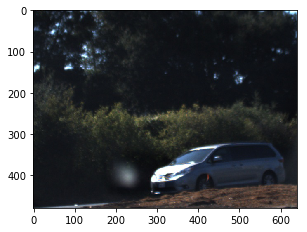

In [30]:
#file_name = "/home/ubuntu/dataset/udacity-dataset/unpacked_data/center/" + str(steering_labels['timestamp'][9]) + ".jpg"
file_name = "/home/ubuntu/dataset/udacity-dataset/unpacked_data/center/1475187219095370199.jpg"
print(file_name)
img = cv2.imread(file_name, 1)
img_size = np.shape(img)
print(img_size)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.show()

# Building a DenseNet